# Proyek Analisis Data: [IBike-sharing-dataset]
- **Nama:** [Albert Putra Pratama Halawa]
- **Email:** [albert.pratama.halawa@gmail.com]
- **ID Dicoding:** [ALBERT PUTRA PRATAMA HALAWA]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [71]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [72]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Tabel day_df

In [73]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [74]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [75]:
print("Jumlah Duplikasi: ",day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [76]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Tabel hour_df

In [77]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [78]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [79]:
print("Jumlah Duplikasi: ",hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [80]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Membersihkan Tabel `day_df`

#### Duplicate Data

In [81]:
print("Jumlah Duplikasi: ",day_df.duplicated().sum())

Jumlah Duplikasi:  0


Missing Values

In [82]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inaccurate values

In [83]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [84]:
day_df[day_df.yr == day_df.yr.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
361,362,2011-12-28,1,0,12,0,3,1,1,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,363,2011-12-29,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999


In [85]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [86]:
day_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Memperbaiki tipe data

In [87]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [89]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Membersihkan Tabel `hour_df`

#### Duplicate Data

In [90]:
hour_df.duplicated().sum()

0

#### Missing Values

In [91]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Innacurate Values

In [92]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [93]:
hour_df[hour_df.yr ==hour_df.yr.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,1,0,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92
8641,8642,2011-12-31,1,0,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71
8642,8643,2011-12-31,1,0,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52
8643,8644,2011-12-31,1,0,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38


#### Memperbaiki Tipe Data

In [94]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [95]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [96]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [97]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
356,357,2011-12-23,1,0,12,0,5,1,1,0.373333,0.377513,0.686250,0.274246,163,2046,2209
561,562,2012-07-15,3,1,7,0,0,0,1,0.745833,0.705196,0.717917,0.166667,1920,4111,6031
261,262,2011-09-19,3,0,9,0,1,1,2,0.549167,0.529675,0.690000,0.151742,691,3848,4539
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996


In [98]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [99]:
day_df.instant.is_unique

True

In [100]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [101]:
day_df.groupby(by="casual").agg({
    "registered": ["max", "min", "mean", "std", ]
})


registered                          
              max   min    mean         std
casual                                     
2              20    20    20.0         NaN
9             674   432   553.0  171.119841
15            416   416   416.0         NaN
25           1137  1137  1137.0         NaN
34            472   472   472.0         NaN
...           ...   ...     ...         ...
3155         4681  4681  4681.0         NaN
3160         5554  5554  5554.0         NaN
3252         3605  3605  3605.0         NaN
3283         3308  3308  3308.0         NaN
3410         4884  4884  4884.0         NaN

[606 rows x 4 columns]

In [102]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)


weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

In [103]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [104]:
day_df["temp_group"] = day_df.temp.apply(lambda x: "Cold" if x <= 0.3 else ("Hot" if x > 0.6 else "Moderate"))

day_df.groupby(by="temp_group").instant.nunique().sort_values(ascending=False)

temp_group
Moderate    342
Hot         254
Cold        135
Name: instant, dtype: int64

#### Explore `hour_df` 

In [105]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16823,16824,2012-12-08,4,1,12,18,0,6,0,1,0.40,0.4091,0.87,0.1045,40,264,304
7334,7335,2011-11-07,4,0,11,5,0,1,1,1,0.30,0.3333,0.93,0.0000,1,25,26
14269,14270,2012-08-22,3,1,8,18,0,3,1,3,0.66,0.6212,0.61,0.2239,91,592,683
7199,7200,2011-11-01,4,0,11,14,0,2,1,1,0.50,0.4848,0.48,0.2537,32,118,150
8239,8240,2011-12-14,4,0,12,23,0,3,1,1,0.32,0.3182,0.70,0.1642,3,48,51


In [106]:
hour_df["usage_time"] = hour_df["hr"] - hour_df["weekday"]

for i in range(len(hour_df["usage_time"])):
    if hour_df.loc[i, "usage_time"] < 0:
        hour_df.loc[i, "usage_time"] = 0

In [107]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,usage_time
8587,8588,2011-12-29,1,0,12,14,0,4,1,2,0.30,0.3333,0.52,0.0000,30,112,142,10
12218,12219,2012-05-29,2,1,5,7,0,2,1,1,0.66,0.6061,0.78,0.2239,19,431,450,5
1992,1993,2011-03-28,2,0,3,21,0,1,1,1,0.32,0.3333,0.21,0.1343,6,55,61,20
17082,17083,2012-12-19,4,1,12,13,0,3,1,1,0.42,0.4242,0.50,0.1940,30,183,213,10
324,325,2011-01-15,1,0,1,0,0,6,0,1,0.18,0.2424,0.55,0.0000,3,25,28,0


In [108]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,usage_time
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,8.877036
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,3.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,9.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,15.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,23.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,6.703511


<Axes: >

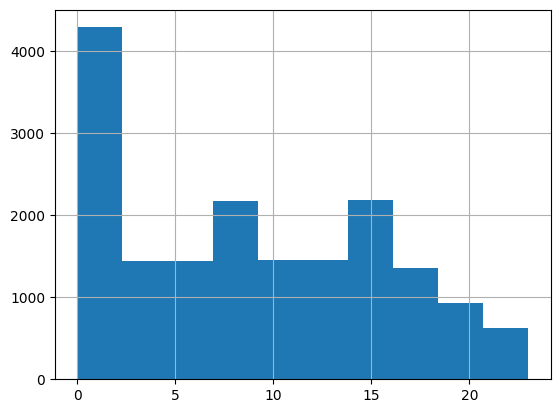

In [109]:
hour_df.usage_time.hist()

In [110]:
hour_df["status"] = hour_df["registered"].apply(lambda x: "Register" if x > 0 else "Not Register")
print(hour_df.sample(5))

       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
3047      3048 2011-05-11       2   0     5  21        0        3           1   
9327      9328 2012-01-29       1   1     1  13        0        0           0   
1256      1257 2011-02-25       1   0     2  12        0        5           1   
11594    11595 2012-05-03       2   1     5   7        0        4           1   
7058      7059 2011-10-26       4   0    10  17        0        3           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
3047            1  0.54  0.5152  0.60     0.0000      32         202  234   
9327            1  0.32  0.3030  0.26     0.2239      78         238  316   
1256            3  0.54  0.5152  0.60     0.4627      20          95  115   
11594           3  0.44  0.4394  0.94     0.1045       8         376  384   
7058            2  0.52  0.5000  0.77     0.1045      40         414  454   

       usage_time    status  
3047           18  R

In [111]:
print(hour_df.groupby(by="status").registered.count())


status
Not Register       24
Register        17355
Name: registered, dtype: int64


In [112]:
print(hour_df[hour_df.status == "Not Register"])


       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
6            7 2011-01-01       1   0     1   6        0        6           0   
210        211 2011-01-10       1   0     1   1        0        1           1   
598        599 2011-01-28       1   0     1   3        0        5           1   
713        714 2011-02-02       1   0     2   2        0        3           1   
1161      1162 2011-02-21       1   0     2   4        1        1           0   
1365      1366 2011-03-02       1   0     3   4        0        3           1   
1413      1414 2011-03-04       1   0     3   4        0        5           1   
1483      1484 2011-03-07       1   0     3   4        0        1           1   
1505      1506 2011-03-08       1   0     3   2        0        2           1   
1551      1552 2011-03-10       1   0     3   0        0        4           1   
1880      1881 2011-03-24       2   0     3   3        0        4           1   
2023      2024 2011-03-30   

### Explore `day_df` & `hour_df`

#### Menggabungkan Data `day_df` & `hour_df`

In [113]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on=["instant"],
    right_on=["instant"]
)
day_hour_df.head()


,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,usage_time,status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0.24,0.2879,0.81,0.0,3,13,16,0,Register
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,1,0.22,0.2727,0.80,0.0,8,32,40,0,Register
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1,0.22,0.2727,0.80,0.0,5,27,32,0,Register
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1,0.24,0.2879,0.75,0.0,3,10,13,0,Register
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1,0.24,0.2879,0.75,0.0,0,1,1,0,Register


In [114]:
day_hour_df.groupby(by=["casual_x", "usage_time"]).agg({
  "hr" : "sum",
  "weekday_y" : "sum"
})


,,hr,weekday_y
casual_x,usage_time,,
2,2,3,1
9,11,31,9
15,2,2,0
25,5,11,6
34,1,1,0
...,...,...,...
3155,6,10,4
3160,0,6,6
3252,2,7,5


In [115]:
day_hour_df.groupby(by=["weathersit_x", "usage_time"]).agg({
  "hr" : "sum",
  "weekday_y" : "sum"
})

hr  weekday_y
weathersit_x usage_time                
1            0           163        319
             1            67         52
             2            62         34
             3           103         52
             4           121         49
...                      ...        ...
3            17           64         13
             18           20          2
             19           21          2
             20           22          2
             22           23          1

[62 rows x 2 columns]

In [116]:
day_hour_df.groupby(by=["season_x", "usage_time"]).agg({
  "hr" : "sum",
  "weekday_y" : "sum"
})

hr  weekday_y
season_x usage_time                
1        0            39         81
         1            19         14
         2            28         16
         3            38         17
         4            45         17
...                  ...        ...
4        19          105         10
         20           86          6
         21           66          3
         22           45          1
         23           23          0

[96 rows x 2 columns]

In [117]:
day_hour_df.groupby(by=["temp_group", "usage_time"]).agg ({
  "hr" : "sum",
  "weekday_y" : "sum"
})

hr  weekday_y
temp_group usage_time                
Cold       0            27         52
           1             8          6
           2            15          7
           3            15          6
           4            41         13
...                    ...        ...
Moderate   19          212         22
           20          126          6
           21          131          5
           22          113          3
           23           69          0

[71 rows x 2 columns]

In [118]:
day_hour_df.groupby(by="weathersit_x").agg({
  "instant" : "nunique",
  "weekday_y" : "sum"
}).sort_values(by="weekday_y", ascending=False)

,instant,weekday_y
weathersit_x,,
1,463,1325
2,247,726
3,21,73


In [119]:
day_hour_df.to_csv("day_hour_df.csv", index=False)

### Explore day_hour_df

## Visualization & Explanatory Analysis

### Pertanyaan 1:
#### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?


In [120]:
day_hour_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,usage_time,status
213,214,2011-08-02,3,0,8,0,2,1,1,0.783333,...,1,0.10,0.1212,0.54,0.1343,1,2,3,3,Register
458,459,2012-04-03,2,1,4,0,2,1,1,0.466667,...,3,0.22,0.2121,0.80,0.2985,0,1,1,0,Register
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,...,2,0.20,0.2273,0.59,0.0896,3,60,63,12,Register
326,327,2011-11-23,4,0,11,0,3,1,2,0.440833,...,2,0.16,0.1970,0.59,0.0896,0,12,12,0,Register
421,422,2012-02-26,1,1,2,0,0,0,1,0.279167,...,1,0.40,0.4091,0.58,0.2537,7,68,75,11,Register


In [121]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Moderate
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Moderate
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cold
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cold
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cold


In [122]:
day_hour_df['mnth_x'] = day_hour_df['mnth_x'].apply(lambda x: calendar.month_name[x])

monthly = day_hour_df.groupby('mnth_x').agg({
  "instant" : "nunique",
  "weekday_x" :"sum"
})

monthly = monthly.reset_index()

monthly.rename(columns={
  "instant" : "order_count",
  "weekday_x" : "revenue"
}, inplace=True)

months_order = [calendar.month_name[i] for i in range(1, 13)]
monthly['mnth_x'] = pd.Categorical(monthly['mnth_x'], categories=months_order, ordered=True)
monthly = monthly.sort_values('mnth_x')

print(monthly.head())


     mnth_x  order_count  revenue
4   January           62      178
3  February           57      171
7     March           62      192
0     April           60      180
8       May           62      180


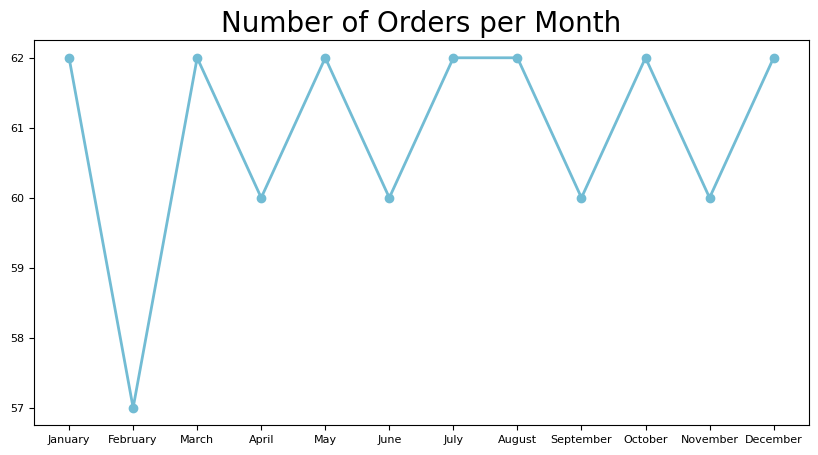

In [123]:
plt.figure(figsize=(10, 5))
plt.plot(
  monthly["mnth_x"],
  monthly["order_count"],
  marker='o',
  linewidth=2,
  color="#72BCD4"
)

plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

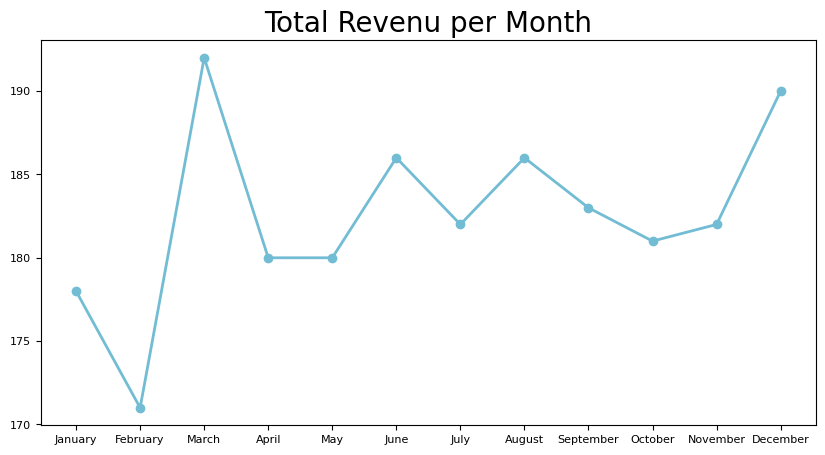

In [124]:
plt.figure(figsize=(10,5))
plt.plot(
  monthly["mnth_x"],
  monthly["revenue"],
  marker='o',
  linewidth=2,
  color="#72BCD4"
)

plt.title("Total Revenu per Month", loc="center", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Pada Cuaca manakah paling banyak dan paling sedikit sepeda digunakan?

In [125]:
sum_item = day_hour_df.groupby("weathersit_y").cnt_y.sum().sort_values(ascending=False).reset_index()
sum_item.head(10)

,weathersit_y,cnt_y
0,1,24866
1,2,13902
2,3,2061
3,4,36


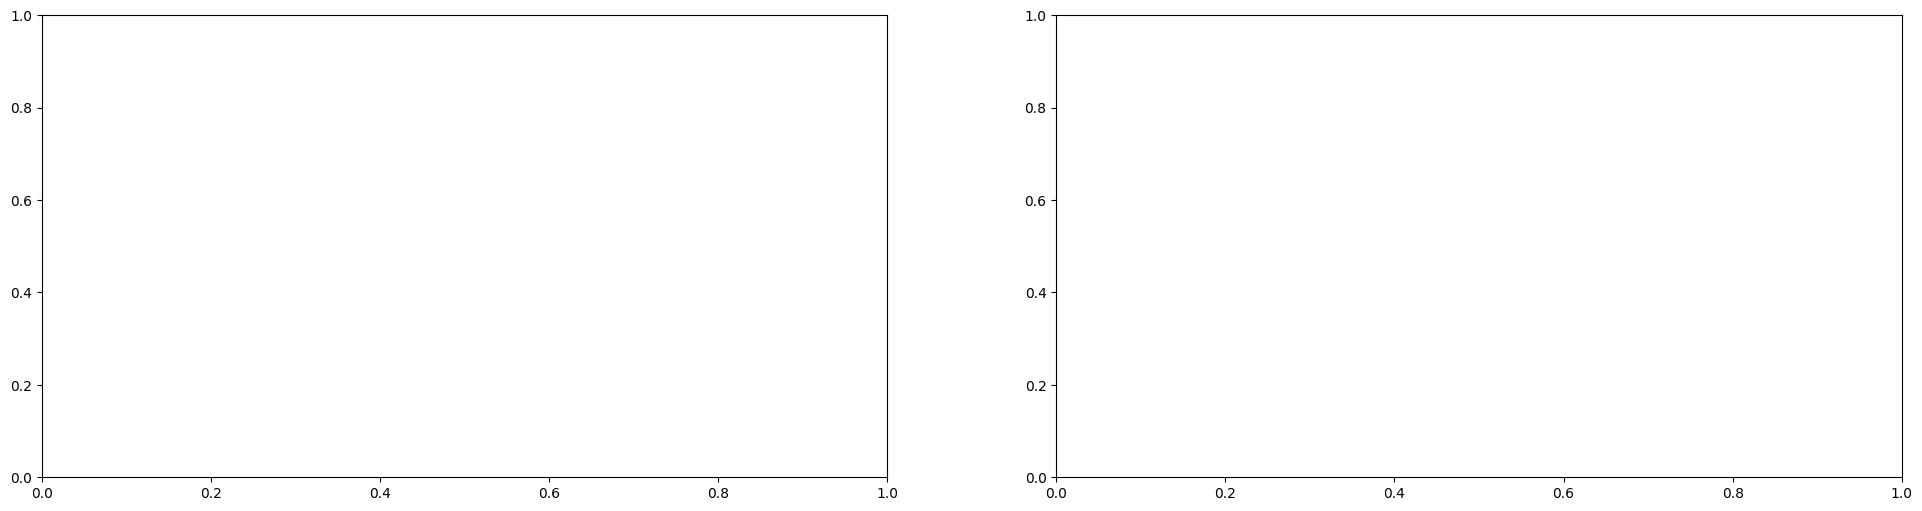

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\4054627344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt_y", y="weathersit_y", data=sum_item.head(5), palette=colors, ax=ax[0])
C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\4054627344.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="cnt_y", y="weathersit_y", data=sum_item.head(5), palette=colors, ax=ax[0])
C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\4054627344.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt_y", y="weathersit_y", data=sum_item.sort_values(by="cnt_y", ascending=True).head(5), palette=colors, ax=ax[1])
C:\Users\Albert\AppDat

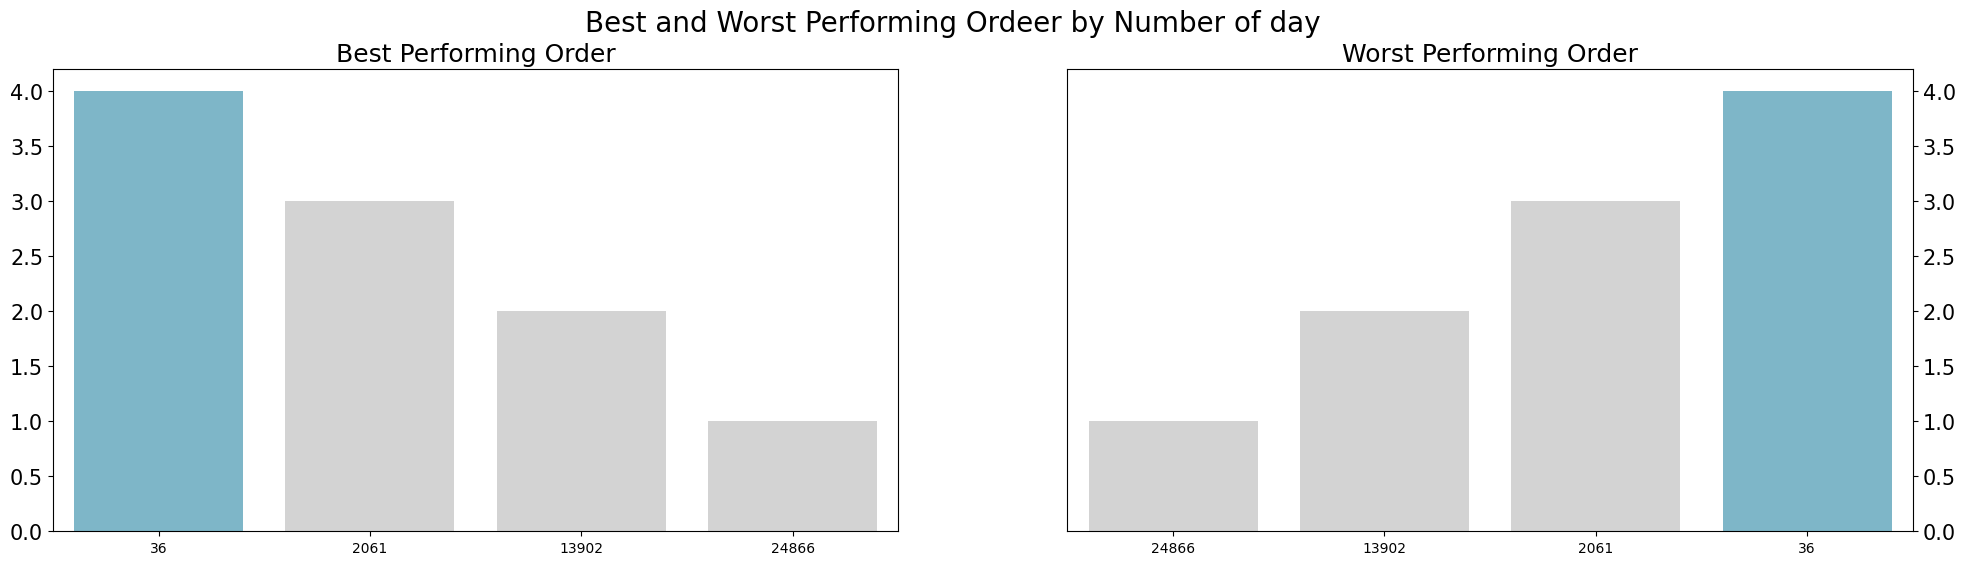

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt_y", y="weathersit_y", data=sum_item.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Order", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=15)

sns.barplot(x="cnt_y", y="weathersit_y", data=sum_item.sort_values(by="cnt_y", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Order", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Ordeer by Number of day", fontsize=20)
plt.show()

### Pertanyaan 2:

### Bagaimana demografi pelanggan yang kita miliki?

#### Berdasarkan temperatur cuaca

In [128]:
by_temp = day_hour_df.groupby(by="temp_group").instant.nunique().reset_index()
by_temp.rename(columns={
  "instant": "customer_count"
}, inplace=True)
by_temp

,temp_group,customer_count
0,Cold,135
1,Hot,254
2,Moderate,342


C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\2465188717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\2465188717.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


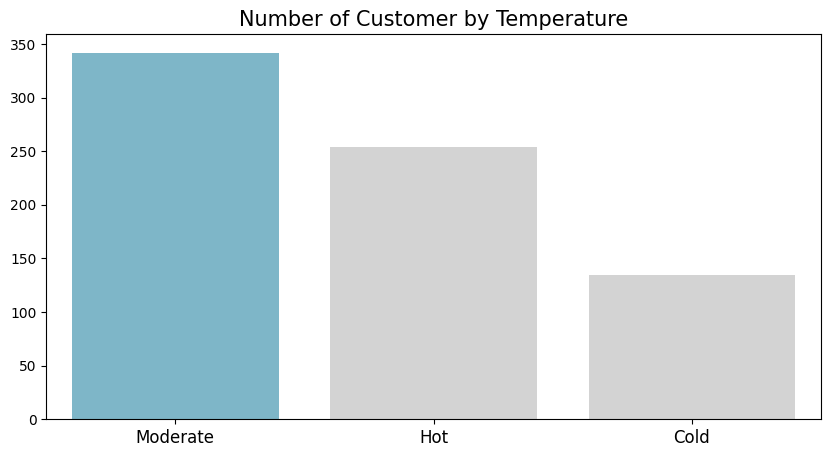

In [129]:
plt.figure(figsize=(10,5))

sns.barplot(
  y="customer_count",
  x="temp_group",
  data=by_temp.sort_values(by="customer_count", ascending=False),
  palette=colors
)
plt.title("Number of Customer by Temperature", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Berdasarkan Musim

In [130]:
by_season = day_hour_df.groupby(by=["season_x"]).instant.nunique().reset_index()
by_season.rename(columns={
  "instant" : "customer_count"
}, inplace=True)
by_season

,season_x,customer_count
0,1,181
1,2,184
2,3,188
3,4,178


In [131]:
print(by_season['season_x'].unique())

season_dict = {1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'}
by_season['season_x'] = by_season['season_x'].map(season_dict)

print(by_season)


[1 2 3 4]
  season_x  customer_count
0   spring             181
1   summer             184
2   autumn             188
3   winter             178


C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\2697263114.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


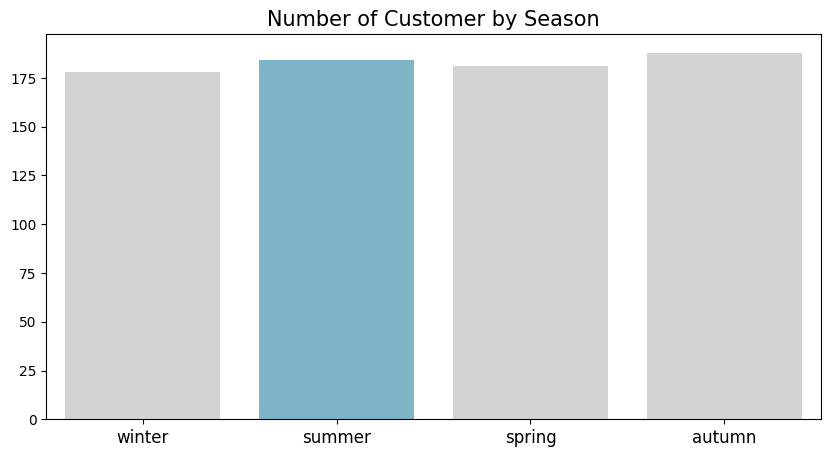

In [132]:
plt.figure(figsize=(10,5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

by_season['season_x'] = by_season['season_x'].astype(str)

sns.barplot(
  y="customer_count",
  x="season_x",
  hue="season_x",  
  data=by_season.sort_values(by="season_x", ascending=False),
  palette=colors_
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.legend().remove() 
plt.show()


#### Berdasarkan waktu penggunaan

In [133]:
by_usage_time = day_hour_df.groupby(by="usage_time").instant.nunique().reset_index()
by_usage_time.rename(columns={
  "instant" : "customer_count"
}, inplace=True)
by_usage_time

,usage_time,customer_count
0,0,111
1,1,24
2,2,28
3,3,31
4,4,30
5,5,30
6,6,30
7,7,31
8,8,31
9,9,31


C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\2412860481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Albert\AppData\Local\Temp\ipykernel_8196\2412860481.py:3: UserWarning: 
The palette list has fewer values (8) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


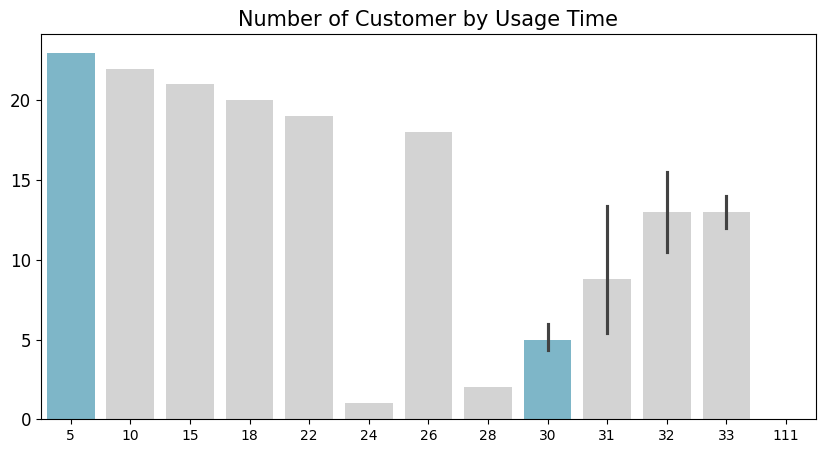

In [134]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="customer_count",
  y="usage_time",
  data=by_usage_time.sort_values(by="customer_count", ascending=False),
  palette=colors_
)
plt.title("Number of Customer by Usage Time", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

#### 